In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Read in nhl_career_per_game df from main Capstone Notebook
nhl_career_per_game = pd.read_csv("C:/Users/joshm/Documents/BrainStation/nhl_career_per_game.csv", index_col=0)
nhl_career_per_game

,GP,TOI/GP,G/60,A/60,G/GP,A/GP,PTS/GP,Shots/GP,PPG/GP,PPA/GP,EvnG/GP,EvnA/GP
Player,,,,,,,,,,,,
A.J. Greer,147,8.50,0.58,0.82,0.08,0.12,0.20,0.95,0.01,0.00,0.07,0.12
Aaron Downey,119,5.02,0.40,0.70,0.03,0.06,0.09,0.39,0.00,0.00,0.03,0.06
Aaron Ekblad,674,22.86,0.45,0.90,0.17,0.34,0.51,2.50,0.06,0.10,0.11,0.23
Aaron Gagnon,19,8.05,0.00,0.78,0.00,0.11,0.11,0.47,0.00,0.00,0.00,0.11
Aaron Johnson,252,14.54,0.25,0.64,0.06,0.15,0.21,0.88,0.01,0.02,0.05,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...
Éric Gélinas,188,15.35,0.29,0.85,0.07,0.22,0.29,1.70,0.05,0.11,0.03,0.11
Éric Perrin,241,16.37,0.49,1.10,0.13,0.30,0.43,1.58,0.02,0.04,0.10,0.20
Ľubomír Višňovský,615,22.59,0.44,1.21,0.16,0.46,0.62,1.84,0.07,0.25,0.10,0.20


In [5]:
nhl_career_per_game['GP']

GP
16      23
15      22
18      18
22      17
19      17
        ..
755      1
757      1
1000     1
487      1
615      1
Name: count, Length: 831, dtype: int64

In [47]:
df = nhl_career_per_game[nhl_career_per_game['GP'] >= 100]
df.sort_values(by='GP', ascending=False)

,GP,TOI/GP,G/60,A/60,G/GP,A/GP,PTS/GP,Shots/GP,PPG/GP,PPA/GP,EvnG/GP,EvnA/GP
Player,,,,,,,,,,,,
Ryan Suter,1437,24.38,0.18,0.99,0.07,0.40,0.47,1.64,0.03,0.15,0.05,0.24
Alex Ovechkin,1417,20.75,1.73,1.42,0.60,0.49,1.09,4.66,0.22,0.19,0.38,0.30
Brent Burns,1372,22.70,0.49,1.19,0.19,0.45,0.63,2.79,0.06,0.16,0.12,0.27
Anže Kopitar,1365,20.91,0.88,1.66,0.31,0.58,0.88,2.36,0.09,0.22,0.21,0.35
Joe Pavelski,1325,18.57,1.16,1.44,0.36,0.44,0.80,2.79,0.13,0.16,0.22,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...
Nikolay Goldobin,101,13.99,0.64,1.10,0.15,0.26,0.41,1.53,0.03,0.08,0.12,0.17
Jeff Giuliano,101,10.84,0.16,0.55,0.03,0.10,0.13,0.61,0.00,0.00,0.03,0.09
Ryan Parent,101,15.87,0.04,0.22,0.01,0.06,0.07,0.45,0.00,0.00,0.01,0.06


In [35]:
df['GP'].value_counts()

GP
50      13
51      12
53      12
64      12
67      11
        ..
1105     1
1047     1
812      1
714      1
615      1
Name: count, Length: 796, dtype: int64

In [48]:
# importing necessary libraries and assigning train/test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# allocating X and y variables
y = df['G/GP']
X = df.drop(columns=['GP', 'G/GP']) # every column except 'G'

# Split the data into train &  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [49]:
# Instantiate a Feed Forward neural network
nhl_nn_model = Sequential()

# dense layers
nhl_nn_model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
nhl_nn_model.add(Dense(40, activation='relu'))
nhl_nn_model.add(Dense(30, activation='relu'))
nhl_nn_model.add(Dense(20, activation='relu'))
nhl_nn_model.add(Dense(10, activation='relu'))

# Single node output as this is regression
nhl_nn_model.add(Dense(1)) # Default activation is linear, no need to define any activation function here

# Compile the model
nhl_nn_model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.MeanSquaredError(), # MSE loss function
             metrics=[MeanSquaredError()]) # MSE evaluation metric

In [50]:
# empty list to accept loss values over epochs
mse_list = []

In [51]:
# Training for 50 epochs
history = nhl_nn_model.fit(X_train, y_train, epochs=50, verbose=True)

# Grab the prediction data
y_pred = nhl_nn_model.predict(X_test)

# append loss values to list
mse_list = mse_list + history.history['mean_squared_error']

Epoch 1/50
38/38 [==============================] - 1s 1ms/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 2/50
38/38 [==============================] - 0s 945us/step - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 3/50
38/38 [==============================] - 0s 1ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 4/50
38/38 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 5/50
38/38 [==============================] - 0s 1ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 6/50
38/38 [==============================] - 0s 986us/step - loss: 9.5931e-04 - mean_squared_error: 9.5931e-04
Epoch 7/50
38/38 [==============================] - 0s 971us/step - loss: 8.6628e-04 - mean_squared_error: 8.6628e-04
Epoch 8/50
38/38 [==============================] - 0s 976us/step - loss: 7.5817e-04 - mean_squared_error: 7.5817e-04
Epoch 9/50
38/38 [==============================] - 0s 945us/step - loss: 6.7614e-04 - mean_squared_

KeyError: 'val_loss'

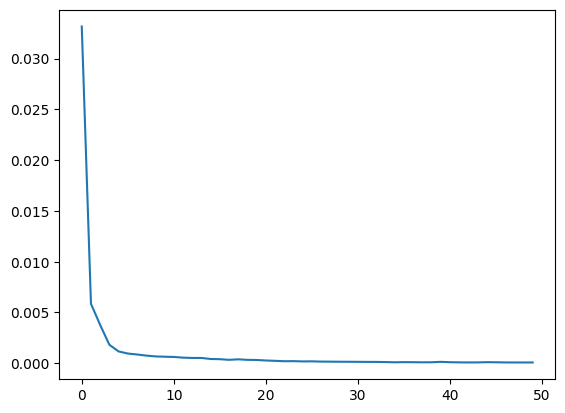

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [53]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = nhl_nn_model.evaluate(X_test, y_test, verbose=0)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {result:.4f}")

y_pred = nhl_nn_model.predict(X_test)

Train Loss: 0.0001


TypeError: unsupported format string passed to list.__format__

In [54]:
len(mse_list)

50

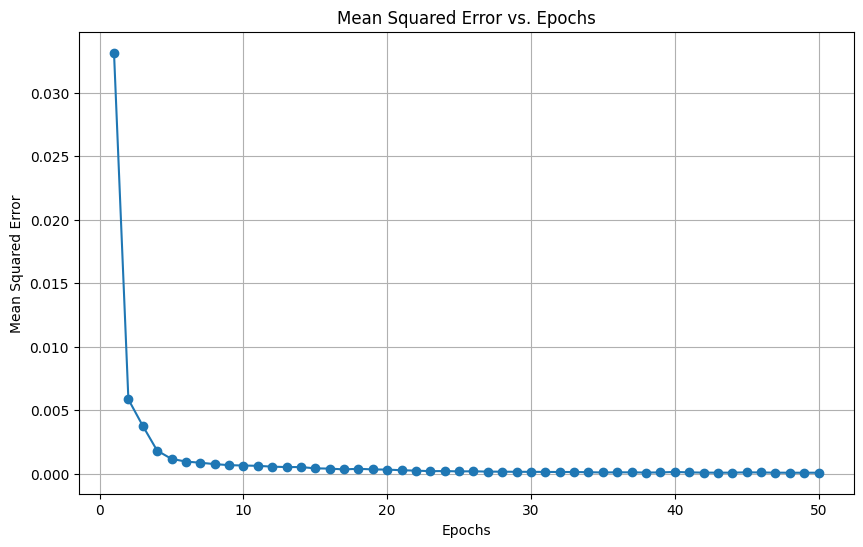

In [55]:
mse_values = [...]  # Replace [...] with your actual MSE values

# Generate epochs (assuming starting from epoch 1)
epochs = range(1, len(mse_list) + 1)

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(epochs, mse_list, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epochs')
plt.grid(True)
plt.show()

In [56]:
nhl_nn_model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 8.6307e-05 - mean_squared_error: 8.6307e-05


[8.630732918391004e-05, 8.630732918391004e-05]

In [57]:
type(y_train)

pandas.core.series.Series

In [58]:
type(X_train)

pandas.core.frame.DataFrame

In [59]:
# converting X_train into a numpy array for fitting the NN model
X_train_array = X_train.values
type(X_train_array)

numpy.ndarray

In [60]:
y_pred.shape

(518, 1)

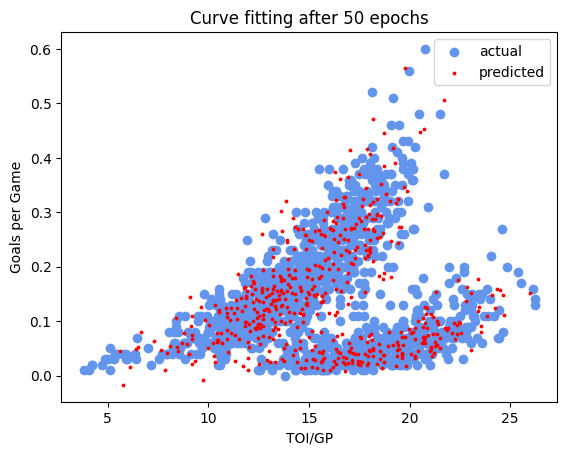

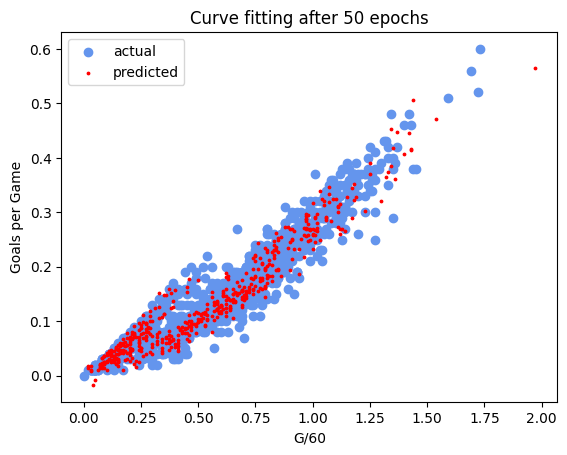

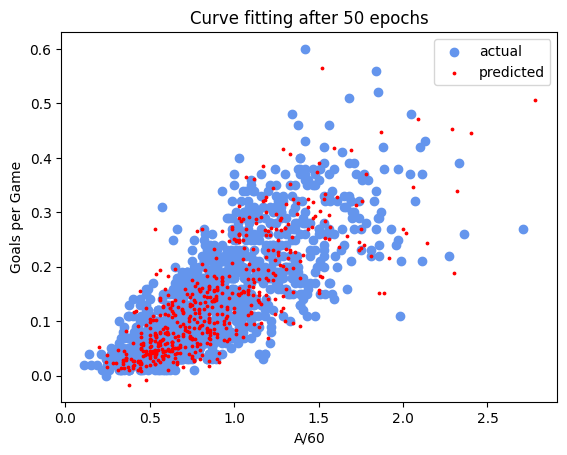

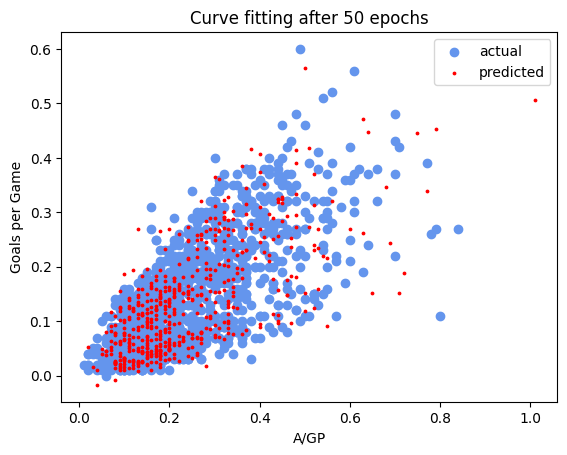

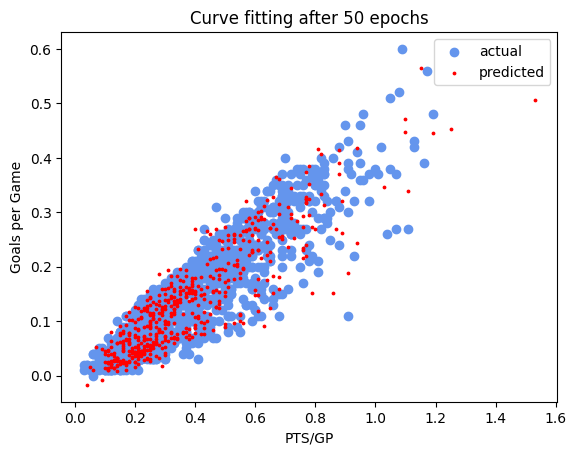

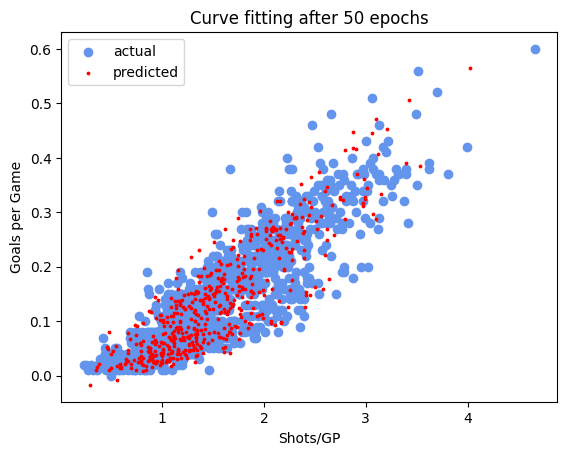

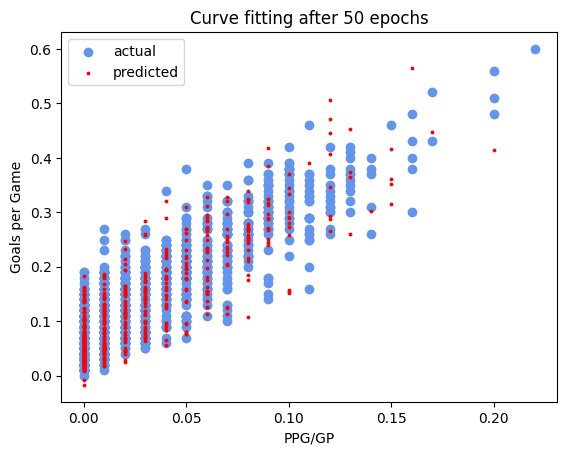

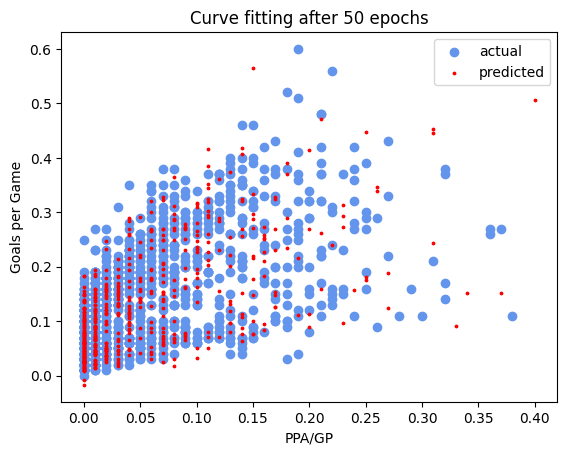

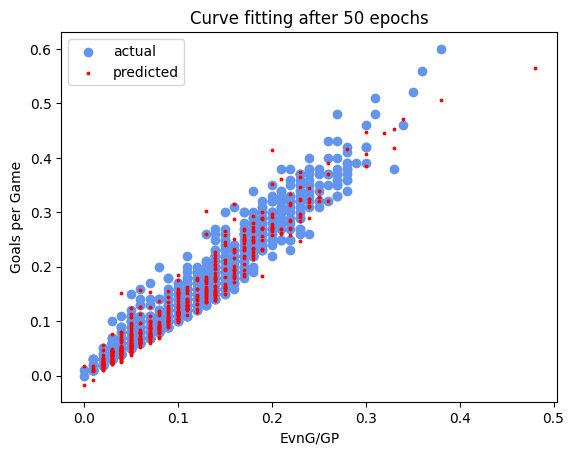

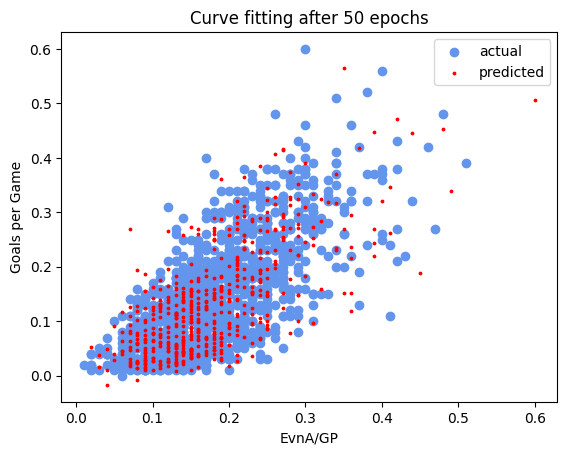

Mean Squared Error (MSE) for 50 epochs:  8.052049088291824e-05


In [61]:
# Plotting target feature vs independent features - Actual vs Predicted
for col in X_train.columns:
    # Plot actual vs. predicted values for each feature
    plt.figure()
    plt.scatter(X_train[col], y_train, label='actual', c="cornflowerblue")  # Plot the actual data
    plt.scatter(X_test[col], y_pred, s=3, color='r', label='predicted')  # Plot the predicted values
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Goals per Game')
    plt.title(f'Curve fitting after 50 epochs')
    plt.show()

# Error for the one epoch
print('Mean Squared Error (MSE) for 50 epochs: ', mse_list[-1])

In [62]:
X_test.shape

(518, 10)

In [63]:
y_pred.shape

(518, 1)

In [64]:
X_train_array.shape

(1207, 10)

In [65]:
X_test['TOI/GP']

Player
Nic Petan           10.34
Teemu Selänne*      17.05
Nick Shore          12.04
Antoine Vermette    17.11
Rob Scuderi         19.32
                    ...  
Ryan Stanton        15.31
Paul Postma         13.00
Adam Mair            8.93
Nathan Paetsch      13.64
Samuel Påhlsson     16.62
Name: TOI/GP, Length: 518, dtype: float64

In [66]:
y_pred.shape

(518, 1)

In [67]:
X_test.columns

Index(['TOI/GP', 'G/60', 'A/60', 'A/GP', 'PTS/GP', 'Shots/GP', 'PPG/GP',
       'PPA/GP', 'EvnG/GP', 'EvnA/GP'],
      dtype='object')

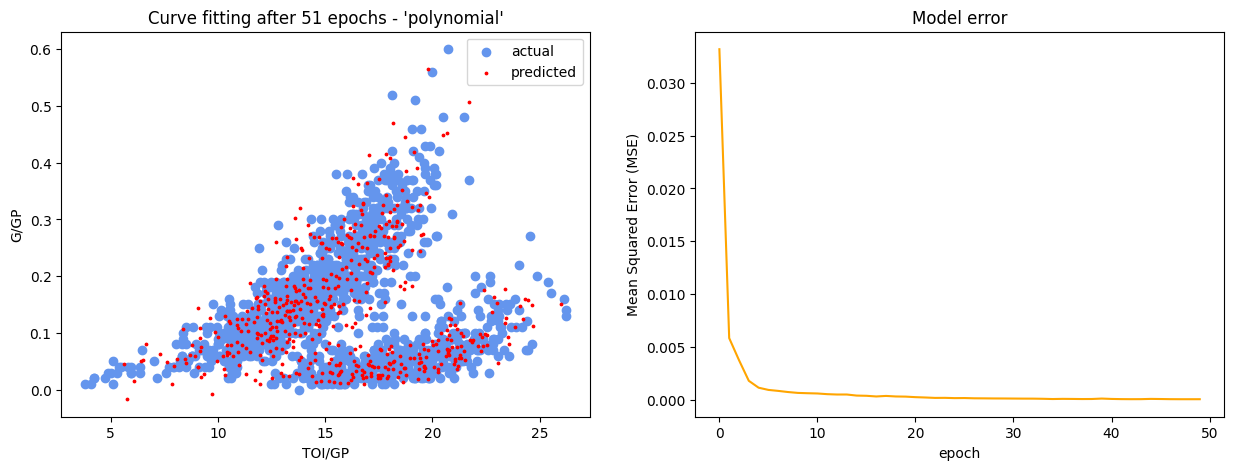

Mean Squared Error (MAE) after 51 epochs:  8.052049088291824e-05


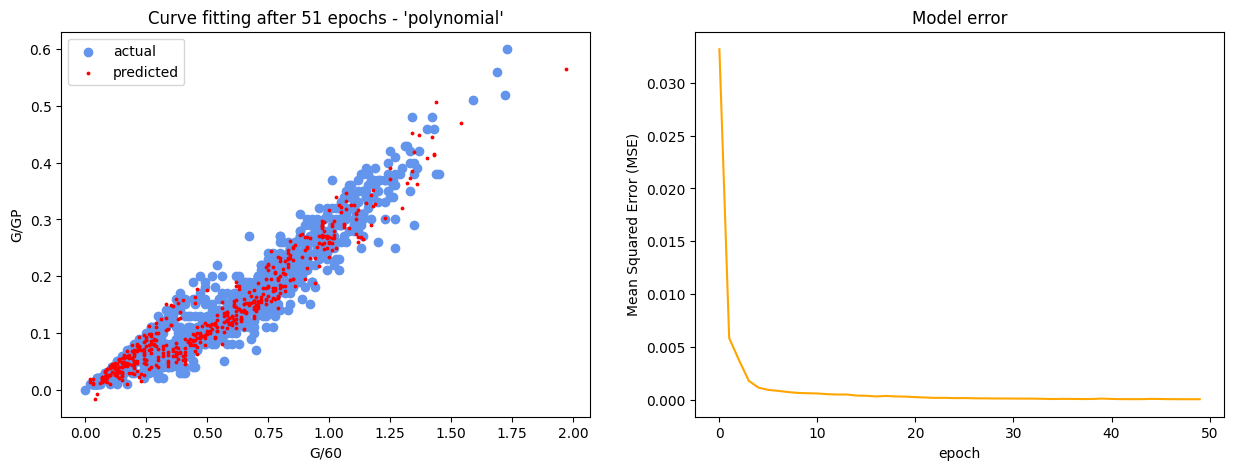

Mean Squared Error (MAE) after 51 epochs:  8.052049088291824e-05


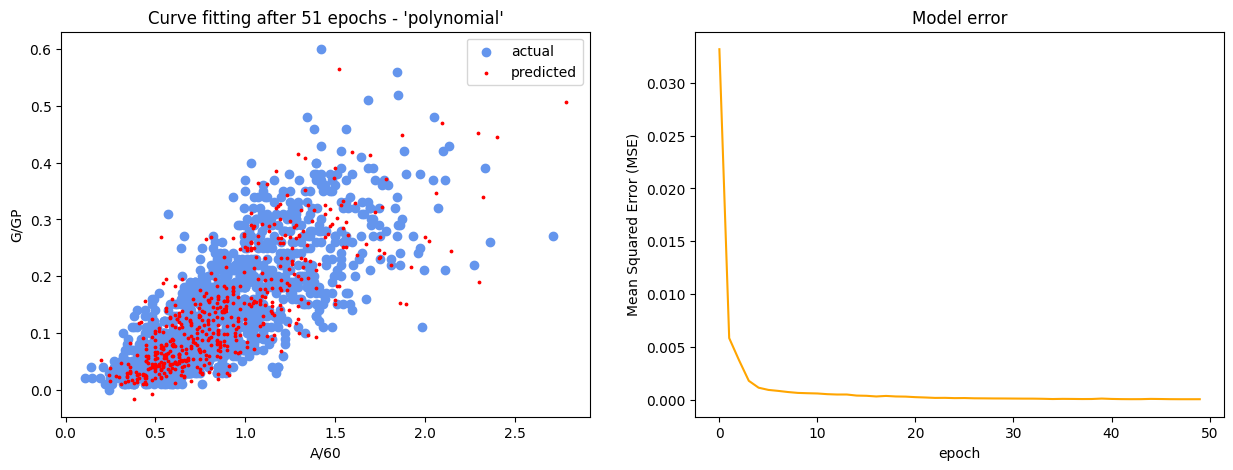

Mean Squared Error (MAE) after 51 epochs:  8.052049088291824e-05


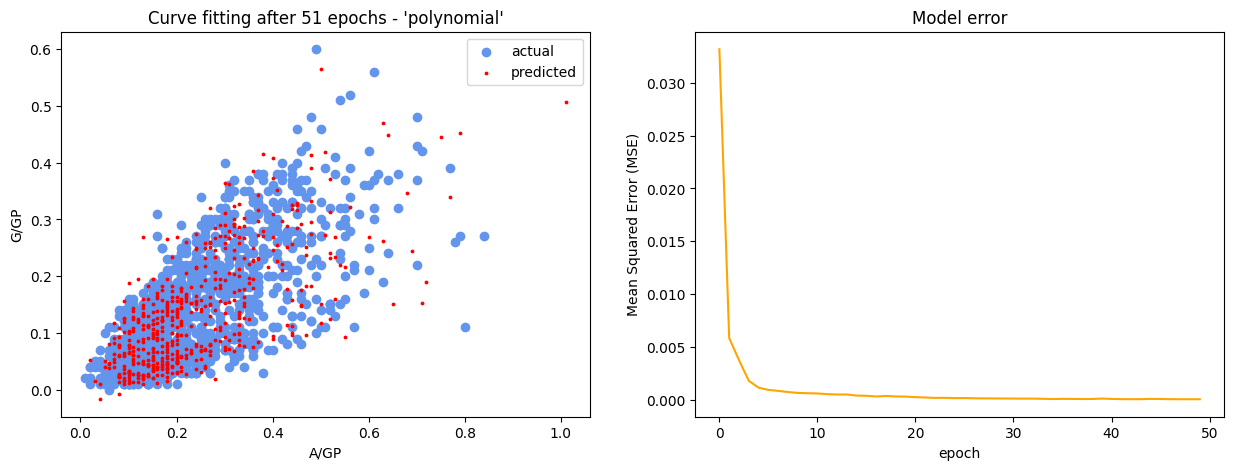

Mean Squared Error (MAE) after 51 epochs:  8.052049088291824e-05


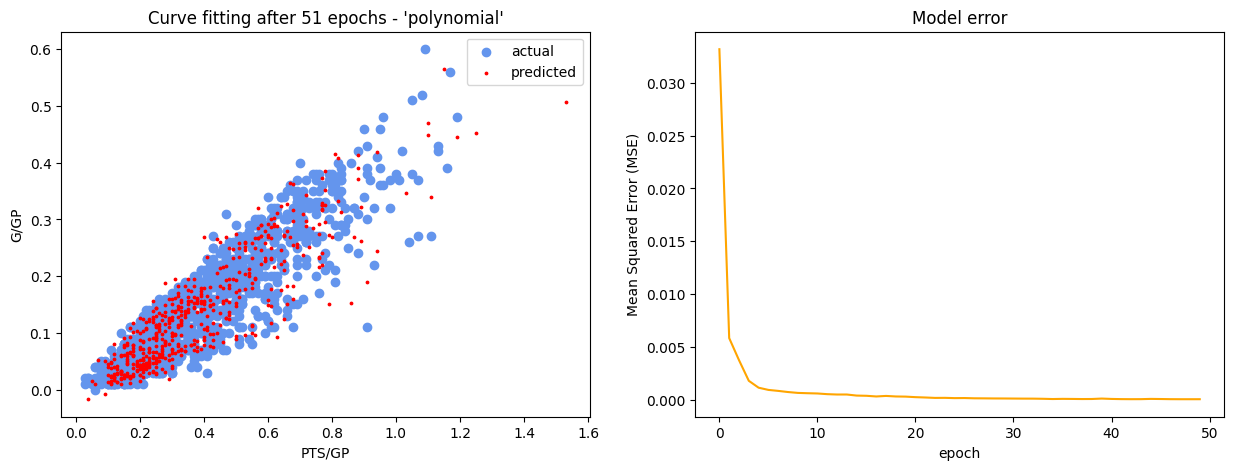

Mean Squared Error (MAE) after 51 epochs:  8.052049088291824e-05


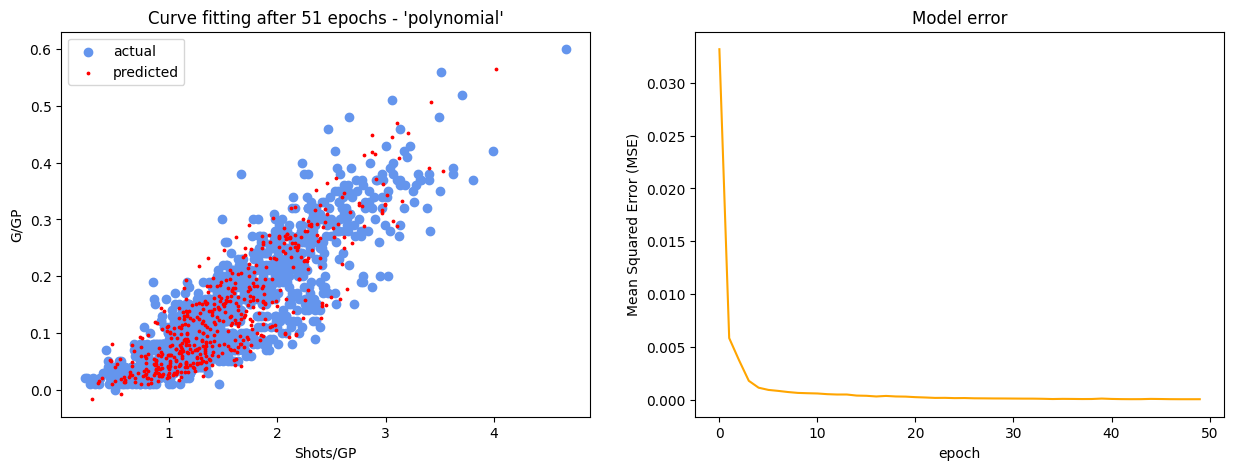

Mean Squared Error (MAE) after 51 epochs:  8.052049088291824e-05


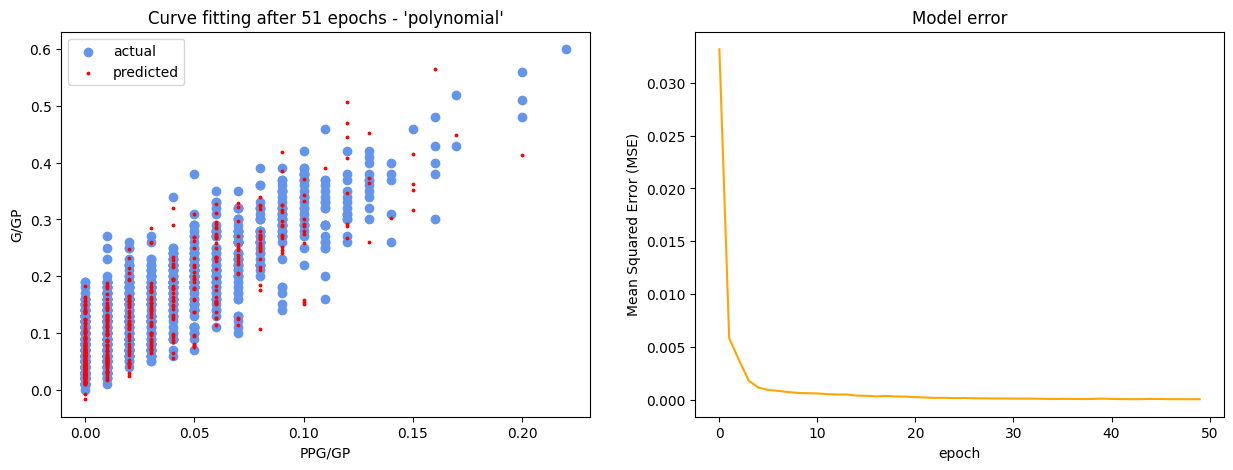

Mean Squared Error (MAE) after 51 epochs:  8.052049088291824e-05


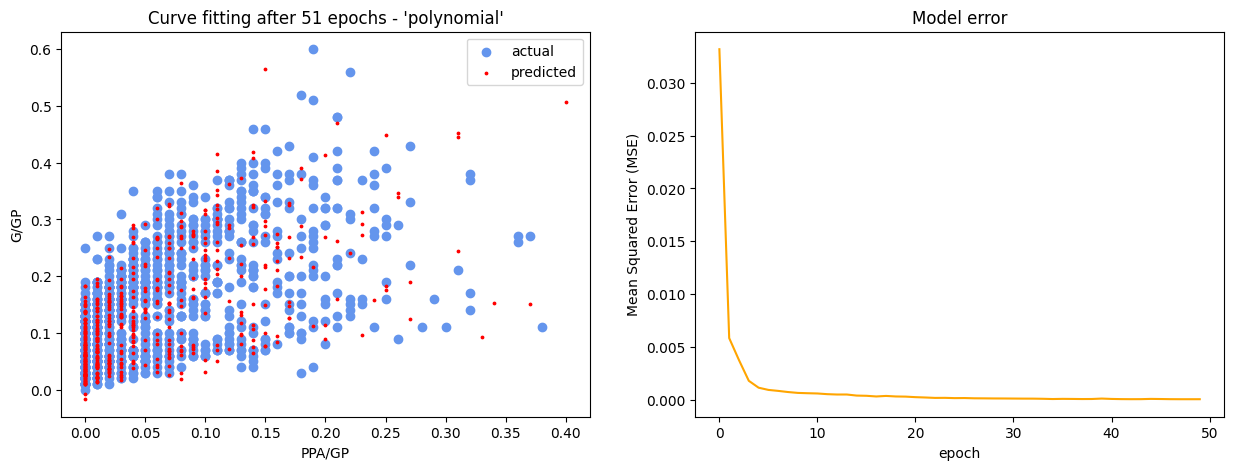

Mean Squared Error (MAE) after 51 epochs:  8.052049088291824e-05


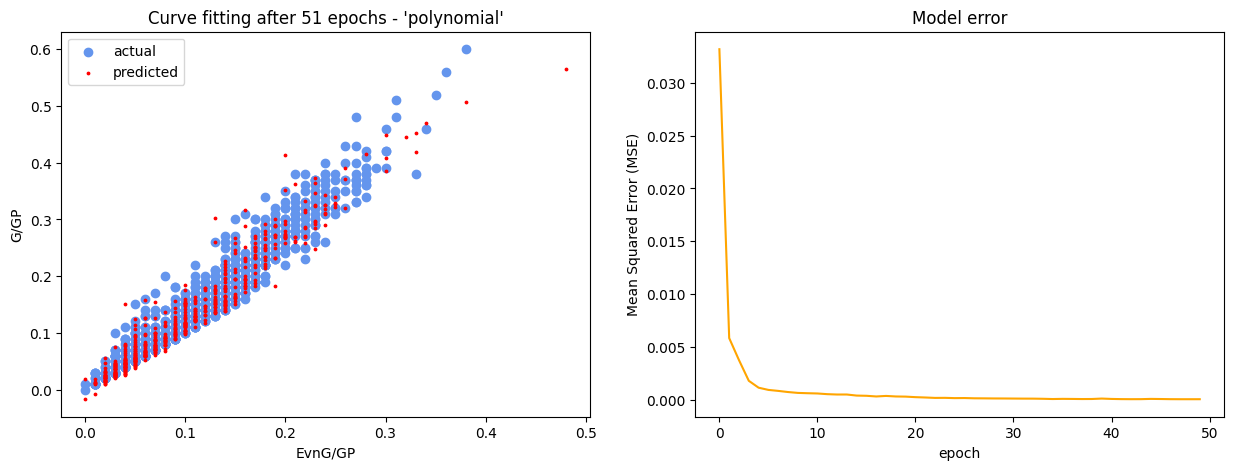

Mean Squared Error (MAE) after 51 epochs:  8.052049088291824e-05


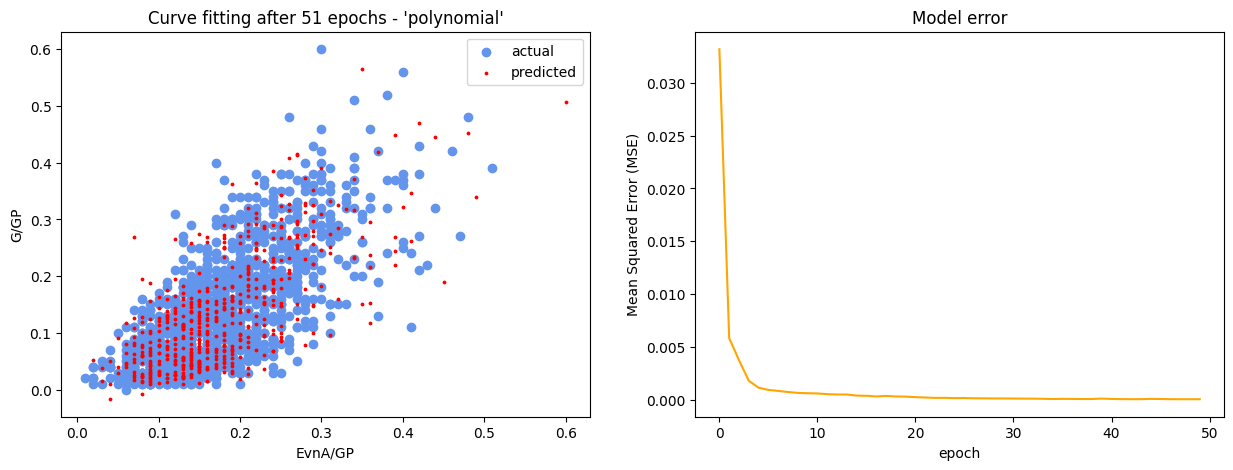

Mean Squared Error (MAE) after 51 epochs:  8.052049088291824e-05


In [68]:
# Plot
for col in X_test.columns:
    plt.subplots(1,2, figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.scatter(X_train[col], y_train, label='actual', c="cornflowerblue") # Plot the actual data
    plt.scatter(X_test[col], y_pred, s=3, color='r', label='predicted') # Plot the predictions
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('G/GP')
    plt.title("Curve fitting after 51 epochs - 'polynomial'")
    
    # Error for each epoch
    plt.subplot(1,2,2)
    plt.plot(mse_list, c='orange')
    plt.title('Model error')
    plt.xlabel('epoch')
    plt.ylabel('Mean Squared Error (MSE)')
    
    # Show
    plt.show()
    
    # Error for the one epoch
    print('Mean Squared Error (MAE) after 51 epochs: ', history.history['mean_squared_error'][-1])

#### Visualizing Predicted vs Actual for test set

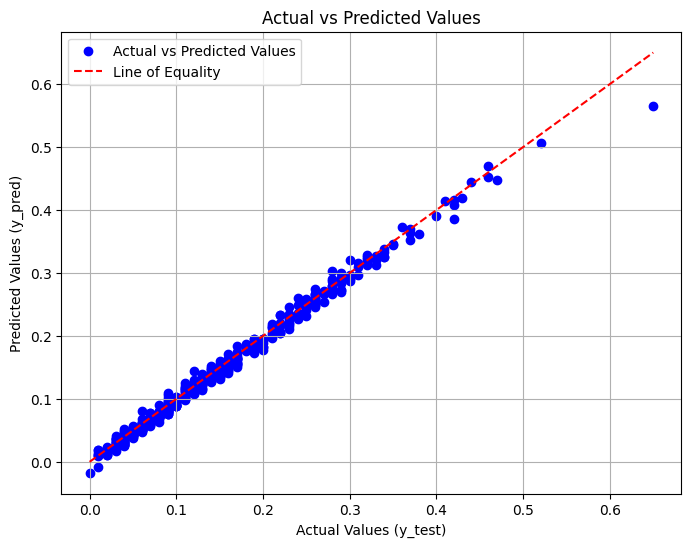

In [69]:
# Plot y_pred vs y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Line of Equality')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Plotly/plotly.graph_objects is not working in this environment. Moving along for now

In [ ]:
# # Create a DataFrame with y_test and y_pred
# import plotly.express as px 
# import plotly.graph_objects as go
# df = pd.DataFrame({'actual goals/game': y_test, 'predicted goals/game': y_pred})

# # Plot y_test vs y_pred
# fig = px.scatter(df, x='actual goals/game', y='predicted goals/game', title='Actual vs Predicted Values', height=900, hover_name=y_test.index)
# fig.add_trace(go.Scatter(x=[df['actual goals/game'].min(), df['actual goals/game'].max()], y=[df['actual goals/game'].min(), df['actual goals/game'].max()], mode='lines', name='Perfect Prediction'))
# fig.show()

In [71]:
y_pred = np.reshape(y_pred, (518,))
y_pred.shape

(518,)

In [72]:
# y_pred must have shape (741,)
df = pd.DataFrame({'actual goals/game': y_test, 'predicted goals/game': y_pred})
df

,actual goals/game,predicted goals/game
Player,,
Nic Petan,0.04,0.025438
Teemu Selänne*,0.41,0.414152
Nick Shore,0.06,0.052543
Antoine Vermette,0.22,0.206670
Rob Scuderi,0.01,0.018475
...,...,...
Ryan Stanton,0.03,0.028579
Paul Postma,0.05,0.045592
Adam Mair,0.06,0.058418


In [73]:
# Creating a table including Difference between Predicted and Actual 

df['Actual Goals'] = round((df['actual goals/game'] * 82), 2)
df['Predicted Goals'] = round((df['predicted goals/game'] * 82), 2)
df['Difference(Actual - Predicted)'] = df['Actual Goals'] - df['Predicted Goals']
df.sort_values(by='Predicted Goals', ascending=False).head(20)

,actual goals/game,predicted goals/game,Actual Goals,Predicted Goals,Difference(Actual - Predicted)
Player,,,,,
Auston Matthews,0.65,0.565372,53.30,46.360001,6.939999
Connor McDavid,0.52,0.506415,42.64,41.529999,1.110001
Jason Robertson,0.46,0.470476,37.72,38.580002,-0.860002
Sidney Crosby,0.46,0.452114,37.72,37.070000,0.650000
Mikko Rantanen,0.47,0.448247,38.54,36.759998,1.780002
Nikita Kucherov,0.44,0.445248,36.08,36.509998,-0.429998
Jake Guentzel,0.43,0.418709,35.26,34.330002,0.929998
Patrik Laine,0.42,0.415884,34.44,34.099998,0.340002
Teemu Selänne*,0.41,0.414152,33.62,33.959999,-0.339999


#### Next I want to run predictions on the entire dataset and visualize

In [74]:
y

Player
A.J. Greer           0.08
Aaron Downey         0.03
Aaron Ekblad         0.17
Aaron Johnson        0.06
Aaron Miller         0.01
                     ... 
Zenon Konopka        0.04
Éric Bélanger        0.16
Éric Gélinas         0.07
Éric Perrin          0.13
Ľubomír Višňovský    0.16
Name: G/GP, Length: 1725, dtype: float64

In [83]:
y_pred_whole

array([0.09449042, 0.03763387, 0.1636679 , ..., 0.06408534, 0.1173626 ,
       0.15420212], dtype=float32)

In [84]:
mse_list[-1]

8.052049088291824e-05

In [85]:
y[1:]

Player
Aaron Downey         0.03
Aaron Ekblad         0.17
Aaron Johnson        0.06
Aaron Miller         0.01
Aaron Rome           0.03
                     ... 
Zenon Konopka        0.04
Éric Bélanger        0.16
Éric Gélinas         0.07
Éric Perrin          0.13
Ľubomír Višňovský    0.16
Name: G/GP, Length: 1724, dtype: float64

In [86]:
y - y_pred_whole

Player
A.J. Greer          -0.014490
Aaron Downey        -0.007634
Aaron Ekblad         0.006332
Aaron Johnson        0.008442
Aaron Miller        -0.003482
                       ...   
Zenon Konopka        0.009719
Éric Bélanger        0.009548
Éric Gélinas         0.005915
Éric Perrin          0.012637
Ľubomír Višňovský    0.005798
Name: G/GP, Length: 1725, dtype: float64

In [87]:
 np.mean(np.square(y - y_pred_whole))

8.069177024922432e-05

In [88]:
y_pred_whole

array([0.09449042, 0.03763387, 0.1636679 , ..., 0.06408534, 0.1173626 ,
       0.15420212], dtype=float32)

In [92]:
# Predict on the test data
y_pred_whole = nhl_nn_model.predict(X)
y_pred_whole = np.reshape(y_pred_whole, (1725,))


# Calculate mean squared error
mse = MeanSquaredError()
print("Mean Squared Error:", mse)

# # Compute the root mean squared error (RMSE)
# rmse = np.sqrt(mse)
# print("Root Mean Squared Error (RMSE):", rmse)

54/54 [==============================] - 0s 793us/step
Mean Squared Error: MeanSquaredError(name=mean_squared_error,dtype=float32)
